# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | kutum
Processing Record 6 of Set 1 | keokuk
Processing Record 7 of Set 1 | kasama
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | chimoio
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | pangnirtung
Processing Record 12 of Set 1 | halifax
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | faya
Processing Record 15 of Set 1 | fort nelson
Processing Record 16 of Set 1 | kangaatsiaq
Processing Record 17 of Set 1 | shangrao
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | vila
Processing Record 21 of Set 1 | khonuu
City not found. Skipping...
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | katobu
Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | indramayu
Processing Record 40 of Set 4 | karaton
Processing Record 41 of Set 4 | taltal
Processing Record 42 of Set 4 | goure
Processing Record 43 of Set 4 | ambon
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | suhbaatar
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | besikduzu
Processing Record 0 of Set 5 | pevek
Processing Record 1 of Set 5 | spassk
Processing Record 2 of Set 5 | mont-de-marsan
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | nelson bay
Processing Record 7 of Set 5 | kloulklubed
Processing Record 8 of Set 5 | romny
Processing Record 9 of Set 5 | dikson
Processing Record 10 of Set 5 | andara

Processing Record 26 of Set 8 | namibe
Processing Record 27 of Set 8 | tura
Processing Record 28 of Set 8 | ballina
Processing Record 29 of Set 8 | san roque dau
Processing Record 30 of Set 8 | glubokiy
Processing Record 31 of Set 8 | altay
Processing Record 32 of Set 8 | ghanzi
Processing Record 33 of Set 8 | belyy yar
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | mahon
Processing Record 36 of Set 8 | dawei
Processing Record 37 of Set 8 | cherskiy
Processing Record 38 of Set 8 | krasnoarmeysk
Processing Record 39 of Set 8 | mendahara
City not found. Skipping...
Processing Record 40 of Set 8 | maldonado
Processing Record 41 of Set 8 | gigmoto
Processing Record 42 of Set 8 | svetlyy
Processing Record 43 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 8 | tartagal
Processing Record 45 of Set 8 | nanga eboko
Processing Record 46 of Set 8 | cockburn town
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | lavumisa
Proces

Processing Record 14 of Set 12 | coracora
Processing Record 15 of Set 12 | chinsali
Processing Record 16 of Set 12 | constantine
Processing Record 17 of Set 12 | vangaindrano
Processing Record 18 of Set 12 | fuxin
Processing Record 19 of Set 12 | ancud
Processing Record 20 of Set 12 | awbari
Processing Record 21 of Set 12 | porto-vecchio
Processing Record 22 of Set 12 | khani
Processing Record 23 of Set 12 | fomboni
Processing Record 24 of Set 12 | oranjemund
Processing Record 25 of Set 12 | shumyachi
Processing Record 26 of Set 12 | jiaojiang
Processing Record 27 of Set 12 | bobrovka
Processing Record 28 of Set 12 | hervey bay
Processing Record 29 of Set 12 | hengyang
Processing Record 30 of Set 12 | khokholskiy
City not found. Skipping...
Processing Record 31 of Set 12 | teshie
Processing Record 32 of Set 12 | varkkallai
Processing Record 33 of Set 12 | sokolac
Processing Record 34 of Set 12 | isla mujeres
Processing Record 35 of Set 12 | luderitz
Processing Record 36 of Set 12 | tot

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,25.99,87,100,7.72,US,1675833066
1,hermanus,-34.4187,19.2345,19.89,82,0,5.87,ZA,1675832634
2,busselton,-33.6500,115.3333,28.07,44,0,3.84,AU,1675832890
3,kutum,14.2000,24.6667,10.24,33,17,4.31,SD,1675833067
4,keokuk,40.3973,-91.3849,2.27,74,40,0.00,US,1675833068


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,25.99,87,100,7.72,US,1675833066
1,hermanus,-34.4187,19.2345,19.89,82,0,5.87,ZA,1675832634
2,busselton,-33.6500,115.3333,28.07,44,0,3.84,AU,1675832890
3,kutum,14.2000,24.6667,10.24,33,17,4.31,SD,1675833067
4,keokuk,40.3973,-91.3849,2.27,74,40,0.00,US,1675833068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

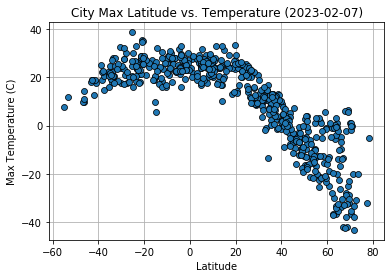

In [8]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

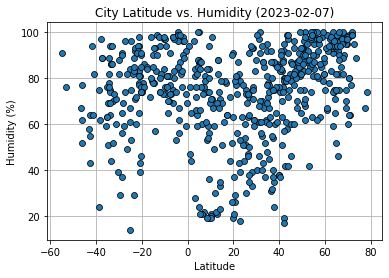

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

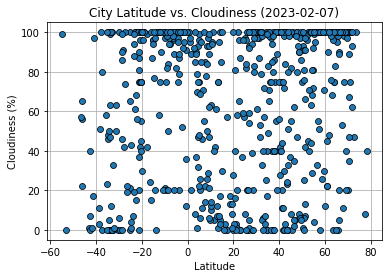

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

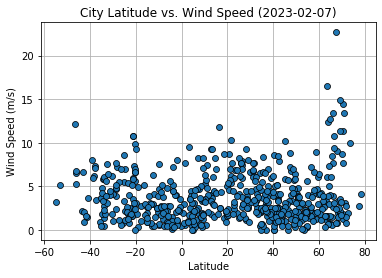

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,25.99,87,100,7.72,US,1675833066
3,kutum,14.2000,24.6667,10.24,33,17,4.31,SD,1675833067
4,keokuk,40.3973,-91.3849,2.27,74,40,0.00,US,1675833068
6,lavrentiya,65.5833,-171.0000,-26.29,92,98,1.52,RU,1675833069
8,nikolskoye,59.7035,30.7861,-1.06,87,100,4.10,RU,1675833070


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,19.89,82,0,5.87,ZA,1675832634
2,busselton,-33.6500,115.3333,28.07,44,0,3.84,AU,1675832890
5,kasama,-10.2129,31.1808,15.87,97,100,2.09,ZM,1675833068
7,chimoio,-19.1164,33.4833,20.92,86,100,0.35,MZ,1675833069
11,mataura,-46.1927,168.8643,9.71,62,56,5.29,NZ,1675833071


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.767422251457691


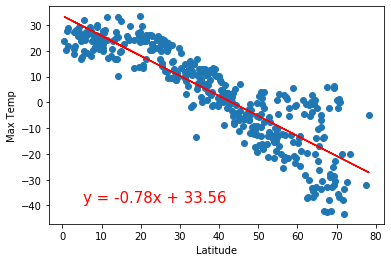

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.16229147604179298


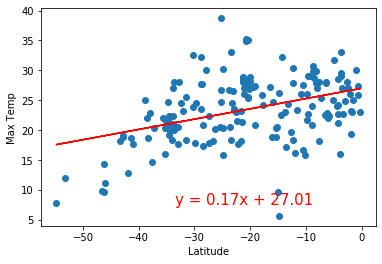

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:** 

Northern Hemisphere: 
 - The relationship between latitude and max tempuratures displays a strong negative correlation.
 - The r-value is ~ 0.77 (rounded up)
 - Max temperature drops as the latitude increases.

Southern Hemisphere: 
  - There is no correlation between latitude and max tempuratures
  - The r-value is ~ 0.16 (rounded up) 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17936236246267967


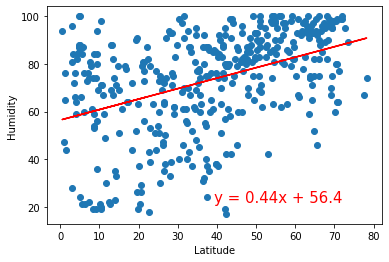

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.09549020548481113


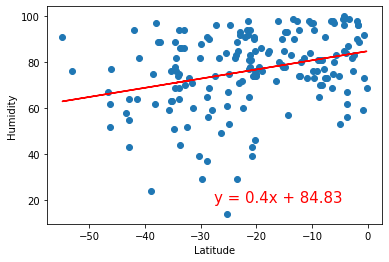

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** 
Northern Hemisphere: 
 - There is no correlation between latitude and humidity 
 - The r-value is ~ 0.18 (rounded up)

Southern Hemisphere: 
  - There is no correlation between latitude and humidity 
 - The r-value is ~ 0.1 (rounded up)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.047327367521520496


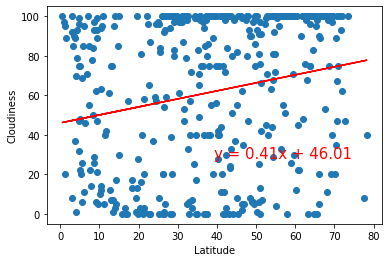

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.18814356406744742


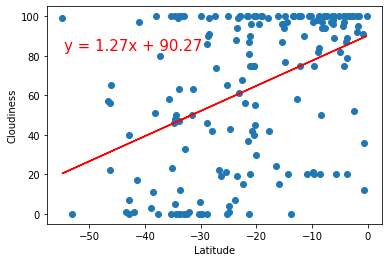

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:**

Northern Hemisphere: 
 - There is no correlation between Latitude and Cloudliness
 - The r-value is ~ 0.05 (rounded up)

Southern Hemisphere: 
 - There is no correlation between Latitude and Cloudliness
 - The r-value is ~ 0.19 (rounded up)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006883131857771707


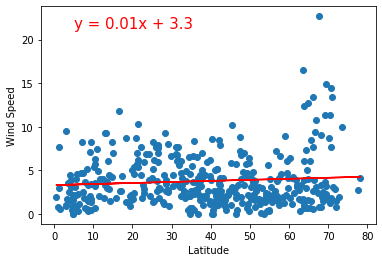

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.08686724916187918


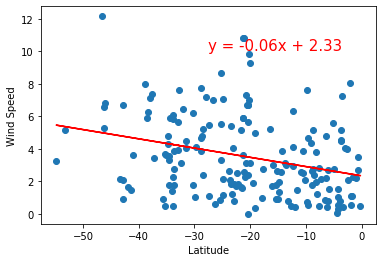

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** 

Northern Hemisphere: 
 - There is no correlation between Latitude and Wind Speed
 - The r-value is ~ 0.01 (rounded up)

Southern Hemisphere: 
 - There is no correlation between Latitude and Wind Speed
 - The r-value is ~ 0.09 (rounded up)